In [26]:
import nltk
#nltk.download()
from nltk.book import *
from nltk.corpus import udhr as udhr
import pandas as pd
# from nltk.corpus import gutenberg as gb

# Problem 1 
1. Use the text of the Universal Declaration of Human Rights (UDHR). 
2. Create a table for 5 languages in which you will collect statistics about the languages used. 
3. Place in that table the number of words in each language in UDHR, number of unique words, average length of words, 
   number of sentences contained in UDHR and average number of words per sentence. 
4. Create a distribution of sentence lengths for each language. 
5. Plot those (non-cumulative) distributions on one diagram. 

### 1. Use the text of the Universal Declaration of Human Rights (UDHR).

In [33]:
udhr.fileids()

[u'Abkhaz-Cyrillic+Abkh',
 u'Abkhaz-UTF8',
 u'Achehnese-Latin1',
 u'Achuar-Shiwiar-Latin1',
 u'Adja-UTF8',
 u'Afaan_Oromo_Oromiffa-Latin1',
 u'Afrikaans-Latin1',
 u'Aguaruna-Latin1',
 u'Akuapem_Twi-UTF8',
 u'Albanian_Shqip-Latin1',
 u'Amahuaca',
 u'Amahuaca-Latin1',
 u'Amarakaeri-Latin1',
 u'Amuesha-Yanesha-UTF8',
 u'Arabela-Latin1',
 u'Arabic_Alarabia-Arabic',
 u'Asante-UTF8',
 u'Ashaninca-Latin1',
 u'Asheninca-Latin1',
 u'Asturian_Bable-Latin1',
 u'Aymara-Latin1',
 u'Balinese-Latin1',
 u'Bambara-UTF8',
 u'Baoule-UTF8',
 u'Basque_Euskara-Latin1',
 u'Batonu_Bariba-UTF8',
 u'Belorus_Belaruski-Cyrillic',
 u'Belorus_Belaruski-UTF8',
 u'Bemba-Latin1',
 u'Bengali-UTF8',
 u'Beti-UTF8',
 u'Bichelamar-Latin1',
 u'Bikol_Bicolano-Latin1',
 u'Bora-Latin1',
 u'Bosnian_Bosanski-Cyrillic',
 u'Bosnian_Bosanski-Latin2',
 u'Bosnian_Bosanski-UTF8',
 u'Breton-Latin1',
 u'Bugisnese-Latin1',
 u'Bulgarian_Balgarski-Cyrillic',
 u'Bulgarian_Balgarski-UTF8',
 u'Cakchiquel-Latin1',
 u'Campa_Pajonalino-Latin1',


### 2. Create a table for 5 languages in which you will collect statistics about the languages used.

In [70]:
languages = [
                'English-Latin1', 
                'Danish_Dansk-Latin1', 
                'German_Deutsch-Latin1', 
                'Filipino_Tagalog-Latin1', 
                'Italian-Latin1'
            ]


### 3. Place in that table the number of words in each language in UDHR, number of unique words, average length of words, number of sentences contained in UDHR and average number of words per sentence.

In [65]:
##https://stackoverflow.com/questions/35900029/average-sentence-length-for-every-text-in-corpus-python3-nltk

np_object=[]
for lang in languages:
    chars_count = len(udhr.raw(lang))
    word_count = len(udhr.words(lang))
    unique_word_count = len(set(udhr.words(lang)))
    word_length_avg = round(chars_count/word_count)
    #word_length_avg = sum(len(sent) for sent in udhr.sents(fileids=[lang])) / len(udhr.sents(fileids=[lang]))
    sents_count = len(udhr.sents(lang))
    avg_num_words_per_sents = round(word_count/sents_count)
    x = [
            lang, 
            word_count,
            unique_word_count,
            word_length_avg,
            sents_count,
            avg_num_words_per_sents
        ]
    np_object.append(x)
    x = []
df = pd.DataFrame(np_object, columns=['language', 'word_count', 'word_count_unique', 'word_length_avg', 'sents_count', 'avg_num_words_per_sents'])    
df

,language,word_count,word_count_unique,word_length_avg,sents_count,avg_num_words_per_sents
0,English-Latin1,1781,533,5.0,67,26.0
1,Danish_Dansk-Latin1,1696,584,5.0,86,19.0
2,German_Deutsch-Latin1,1521,579,6.0,60,25.0
3,Filipino_Tagalog-Latin1,1803,480,5.0,75,24.0
4,Italian-Latin1,1723,578,5.0,51,33.0


### 4. Create a distribution of sentence lengths for each language.

In [66]:
cfd = nltk.ConditionalFreqDist(
            (lang, len(sent))
            for lang in languages
            for sent in udhr.sents(lang))
    
# (lang, (sum(len(sent))/ len(udhr.sents(fileids=[lang])))   
cfd

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'Danish_Dansk-Latin1': FreqDist({3: 28,
                               6: 2,
                               7: 3,
                               10: 1,
                               11: 3,
                               12: 3,
                               13: 1,
                               14: 4,
                               15: 3,
                               16: 3,
                               17: 1,
                               18: 3,
                               19: 3,
                               20: 1,
                               21: 2,
                               22: 1,
                               23: 2,
                               26: 4,
                               27: 1,
                               28: 2,
                               29: 2,
                               31: 2,
                               34: 2,
                               37: 1,
                    

In [67]:
cfd.tabulate(conditions=languages, samples=range(10), cumulative=True)

                         0  1  2  3  4  5  6  7  8  9 
         English-Latin1  0  0  0  0  2  2  3  3  3  4 
    Danish_Dansk-Latin1  0  0  0 28 28 28 30 33 33 33 
  German_Deutsch-Latin1  0  0  0  1  1  2  2  2  3  5 
Filipino_Tagalog-Latin1  0  0 13 13 23 23 23 23 23 24 
         Italian-Latin1  0  0  0  0  0  0  0  0  1  1 


# 5. Plot those (non-cumulative) distributions on one diagram. 

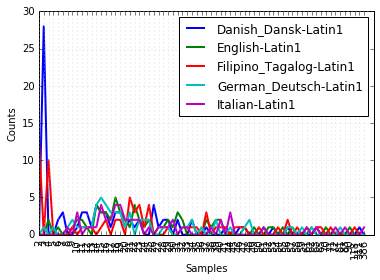

In [68]:
cfd.plot(cumulative=False)

# Plotting for fun cumualtive distributions on one diagram

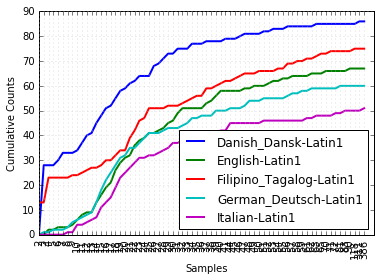

In [69]:
cfd.plot(cumulative=True)